# Misspelled Words #

Hypothesis: “The meaning of comments containing multiple misspelled words are harder to understand”

Reason: “Because online comments often do not basically follow formal language conventions, there are many unstructured, informal and often misspelled and abbreviations. These make the abusive detection very difficult.“ (Detecting context abusiveness using hierarchical deep learning, Lee et al. 2019)

Source: pyspellchecker Library (https://github.com/barrust/pyspellchecker)

#### Example ####

In [ ]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')

In [18]:
# als Teilwort
from spellchecker import SpellChecker

spellChecker = SpellChecker(language=u'de', case_sensitive=True)
def get_errors(tokens):
    return len(spellChecker.unknown(tokens.text))
def all(c):
    return True


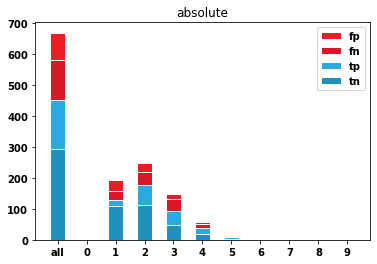

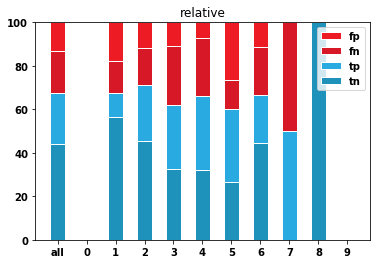

In [19]:
diagram_filters = []
diagram_filters.append(('all', all))

start = 0
stop = 10
step = 1
def generate_filter(i):
    def f(element):
        ld = get_errors(element['tokens'])
        if ld == i:
            return True
        return False
    return f

for i in range(start, stop, step):
    diagram_filters.append(('%s' % (i),generate_filter(i)))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [17]:
print('All')
show_metrics(calc_metrics())
print('number of misspelled words: 3')
show_metrics(calc_metrics(diagram_filters[3][1]))
print('number of misspelled words: 3 difference')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[3][1])))

All


,label hate (287),label nohate (383)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


number of misspelled words: 3


,label hate (84),label nohate (64)
pred hate (60),44,16
pred nohate (88),40,48


accuracy,precision,recall,f1_score
0.6216216216216216,0.7333333333333333,0.5238095238095238,0.611111111111111


number of misspelled words: 3 difference


,label hate (287),label nohate (383)
pred hate (269),197,72
pred nohate (401),90,311


accuracy,precision,recall,f1_score
0.7582089552238805,0.7323420074349443,0.686411149825784,0.7086330935251799
